# Rock Shi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Insurance

In [175]:
# part a
insurance_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# part b
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


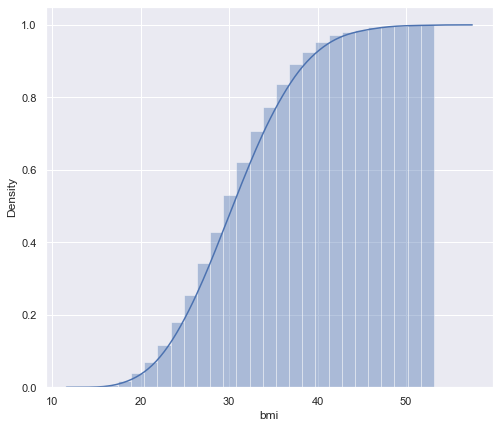

In [14]:
# part c
def plotting(kind_of_plot, x):
    if kind_of_plot == 'density':
        sns.set(rc = {'figure.figsize' : (8, 7)})
        sns.kdeplot(x, shade = True, color = 'olive')
        
    elif kind_of_plot == 'cdf':
        sns.distplot(x, hist_kws = {'cumulative':True}, kde_kws = {'cumulative':True})
        
    elif kind_of_plot == 'box and whisker':
        sns.boxplot(data = x, palette = "magma", orient = 'h')
    
    elif kind_of_plot == 'violin':
        sns.violinplot(data = x)

plotting('cdf', insurance_df['bmi']) #replace first value with what type of plot you want and second value with what attribute

In [22]:
# part d
print('The highest age is', insurance_df['age'].max())
print('The number of people at age', insurance_df['age'].max(), 'is', len(insurance_df[insurance_df['age'] == insurance_df['age'].max()]))

The highest age is 64
The number of people at age 64 is 22


In [26]:
# part e
display(insurance_df.sort_values(by = 'charges', ascending = False))

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
...,...,...,...,...,...,...,...
22,18,male,34.100,0,no,southeast,1137.01100
663,18,male,33.660,0,no,southeast,1136.39940
1244,18,male,33.330,0,no,southeast,1135.94070
808,18,male,30.140,0,no,southeast,1131.50660


In [27]:
# part f
display(insurance_df.sort_values(by = 'bmi', ascending = False))

'''
The person with the highest bmi has significantly lower charges than the person with second highest 
with the main difference being that he doesn't smoke.
'''

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.130,0,no,southeast,1163.46270
1047,22,male,52.580,1,yes,southeast,44501.39820
847,23,male,50.380,1,no,southeast,2438.05520
116,58,male,49.060,0,no,southeast,11381.32540
286,46,female,48.070,2,no,northeast,9432.92530
...,...,...,...,...,...,...,...
1286,28,female,17.290,0,no,northeast,3732.62510
412,26,female,17.195,2,yes,northeast,14455.64405
1226,38,male,16.815,2,no,northeast,6640.54485
428,21,female,16.815,1,no,northeast,3167.45585


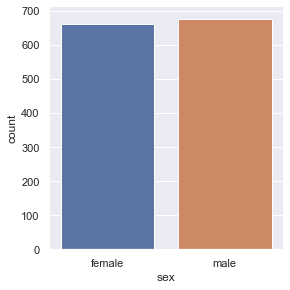

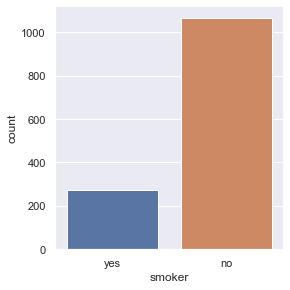

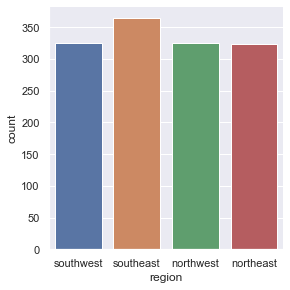

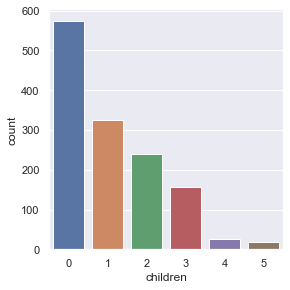

In [146]:
# part g
sns.catplot(x = 'sex', kind = 'count', data = insurance_df, height = 4)
sns.catplot(x = 'smoker', kind = 'count', data = insurance_df, height = 4)
sns.catplot(x = 'region', kind = 'count', data = insurance_df, height = 4)
sns.catplot(x = 'children', kind = 'count', data = insurance_df, height = 4)

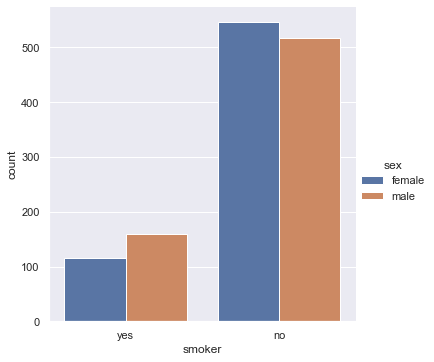

In [31]:
# part h
sns.catplot(x = 'smoker', kind = 'count', data = insurance_df, hue = 'sex')
plt.show()

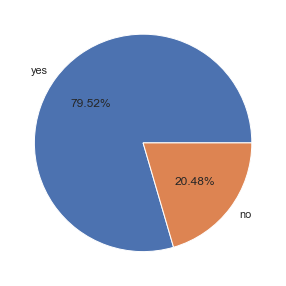

In [34]:
# part i
plt.figure(figsize = (5,5))
plt.pie(insurance_df['smoker'].value_counts(), labels = insurance_df['smoker'].unique(), autopct = '%1.2f%%')
plt.show()

In [36]:
# part j
display(insurance_df.groupby('smoker').agg({'charges':'mean'}))

,charges
smoker,
no,8434.268298
yes,32050.231832


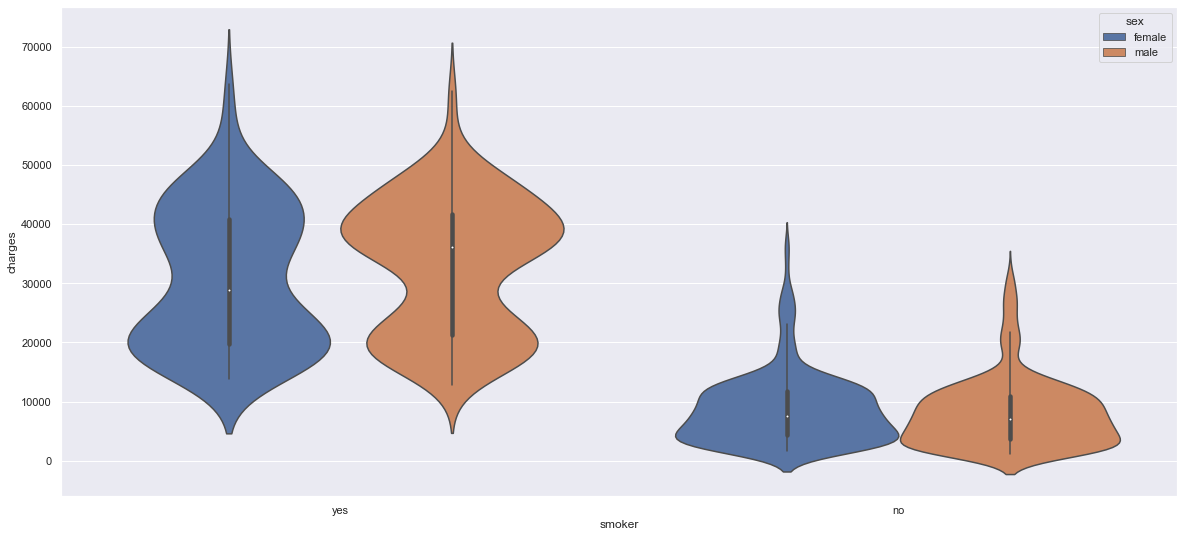

In [41]:
# part k
plt.figure(figsize = (20,9))
sns.violinplot(x = 'smoker', y = 'charges', data = insurance_df, hue = 'sex')
plt.show()

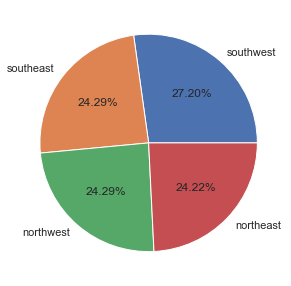

In [42]:
# part l
plt.figure(figsize = (5,5))
plt.pie(insurance_df['region'].value_counts(), labels = insurance_df['region'].unique(), autopct = '%1.2f%%')
plt.show()

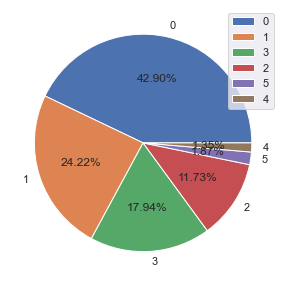

In [48]:
# part m
plt.figure(figsize = (5,5))
plt.pie(insurance_df['children'].value_counts(), labels = insurance_df['children'].unique(), autopct = '%1.2f%%')
plt.legend()
plt.show()

In [187]:
# part n
gender = pd.get_dummies(insurance_df['sex'])
insurance_df2 = pd.concat([insurance_df, gender], axis = 1)
insurance_df2.drop(['sex'], axis = 1, inplace = True)

region = pd.get_dummies(insurance_df['region'])
insurance_df2 = pd.concat([insurance_df2, region], axis = 1)
insurance_df2.drop(['region'], axis = 1, inplace = True)
display(insurance_df2)


,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,yes,16884.92400,1,0,0,0,0,1
1,18,33.770,1,no,1725.55230,0,1,0,0,1,0
2,28,33.000,3,no,4449.46200,0,1,0,0,1,0
3,33,22.705,0,no,21984.47061,0,1,0,1,0,0
4,32,28.880,0,no,3866.85520,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,0,1,0,1,0,0
1334,18,31.920,0,no,2205.98080,1,0,1,0,0,0
1335,18,36.850,0,no,1629.83350,1,0,0,0,1,0
1336,21,25.800,0,no,2007.94500,1,0,0,0,0,1


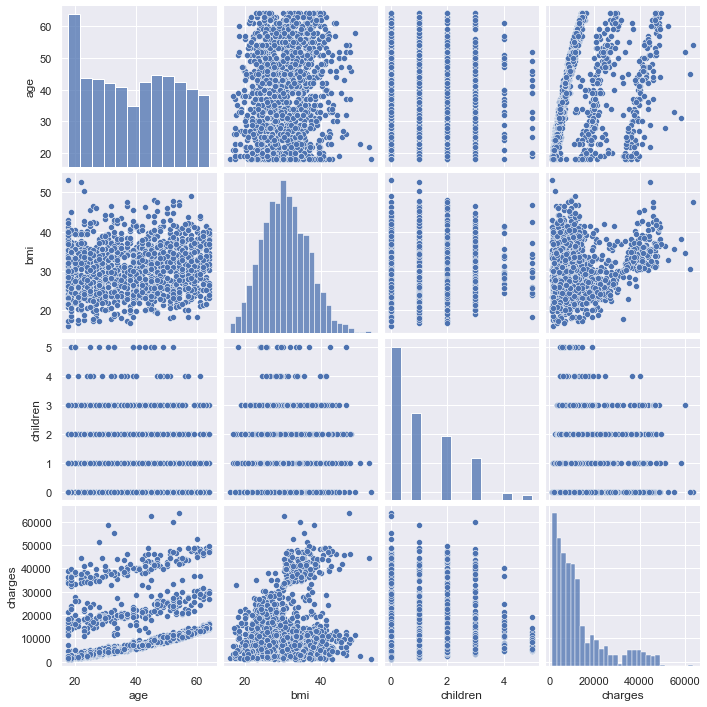

In [57]:
# part o
sns.pairplot(insurance_df)

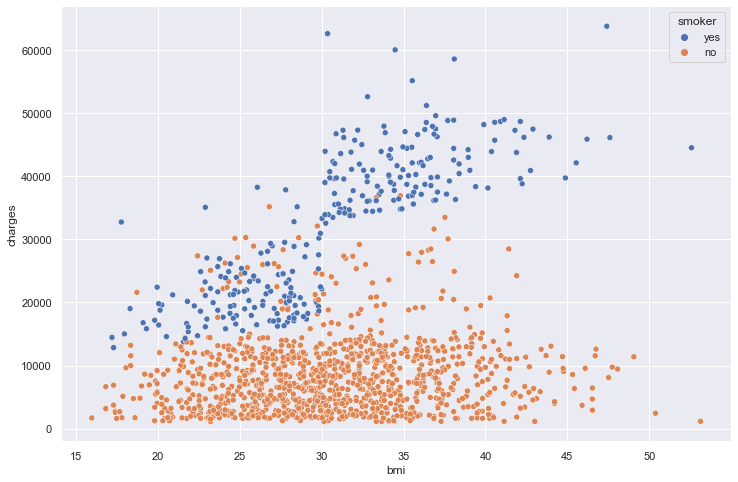

In [54]:
# part p
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'bmi', y = 'charges', data = insurance_df, hue = 'smoker')
plt.show()

<AxesSubplot:>

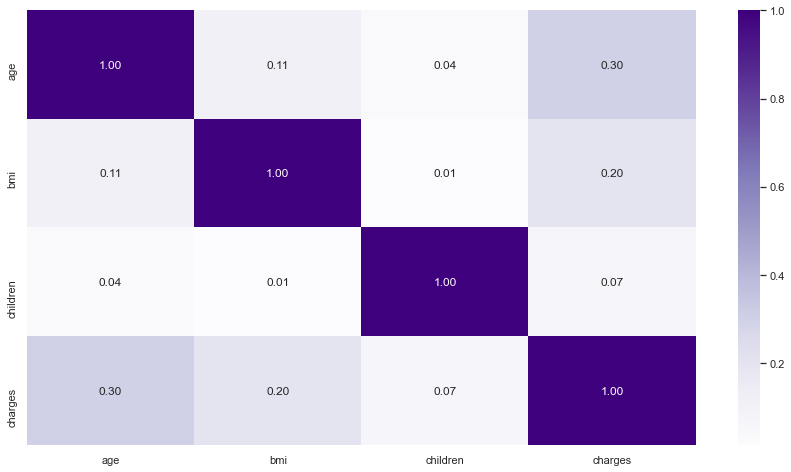

In [56]:
# part q
plt.figure(figsize = (15,8))
sns.heatmap(insurance_df.corr(), annot = True, cmap = 'Purples', fmt = '0.2f')

### Video Games Sales

In [188]:
videogame_df = pd.read_csv('C:/Users/Rock Shi/Downloads/Video_Games_Sales.csv')

<AxesSubplot:>

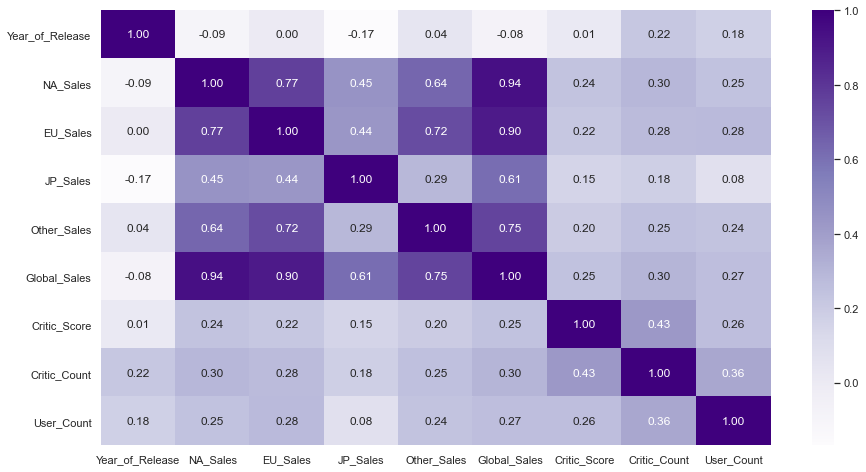

In [59]:
# part a
plt.figure(figsize = (15,8))
sns.heatmap(videogame_df.corr(), annot = True, cmap = 'Purples', fmt = '0.2f')

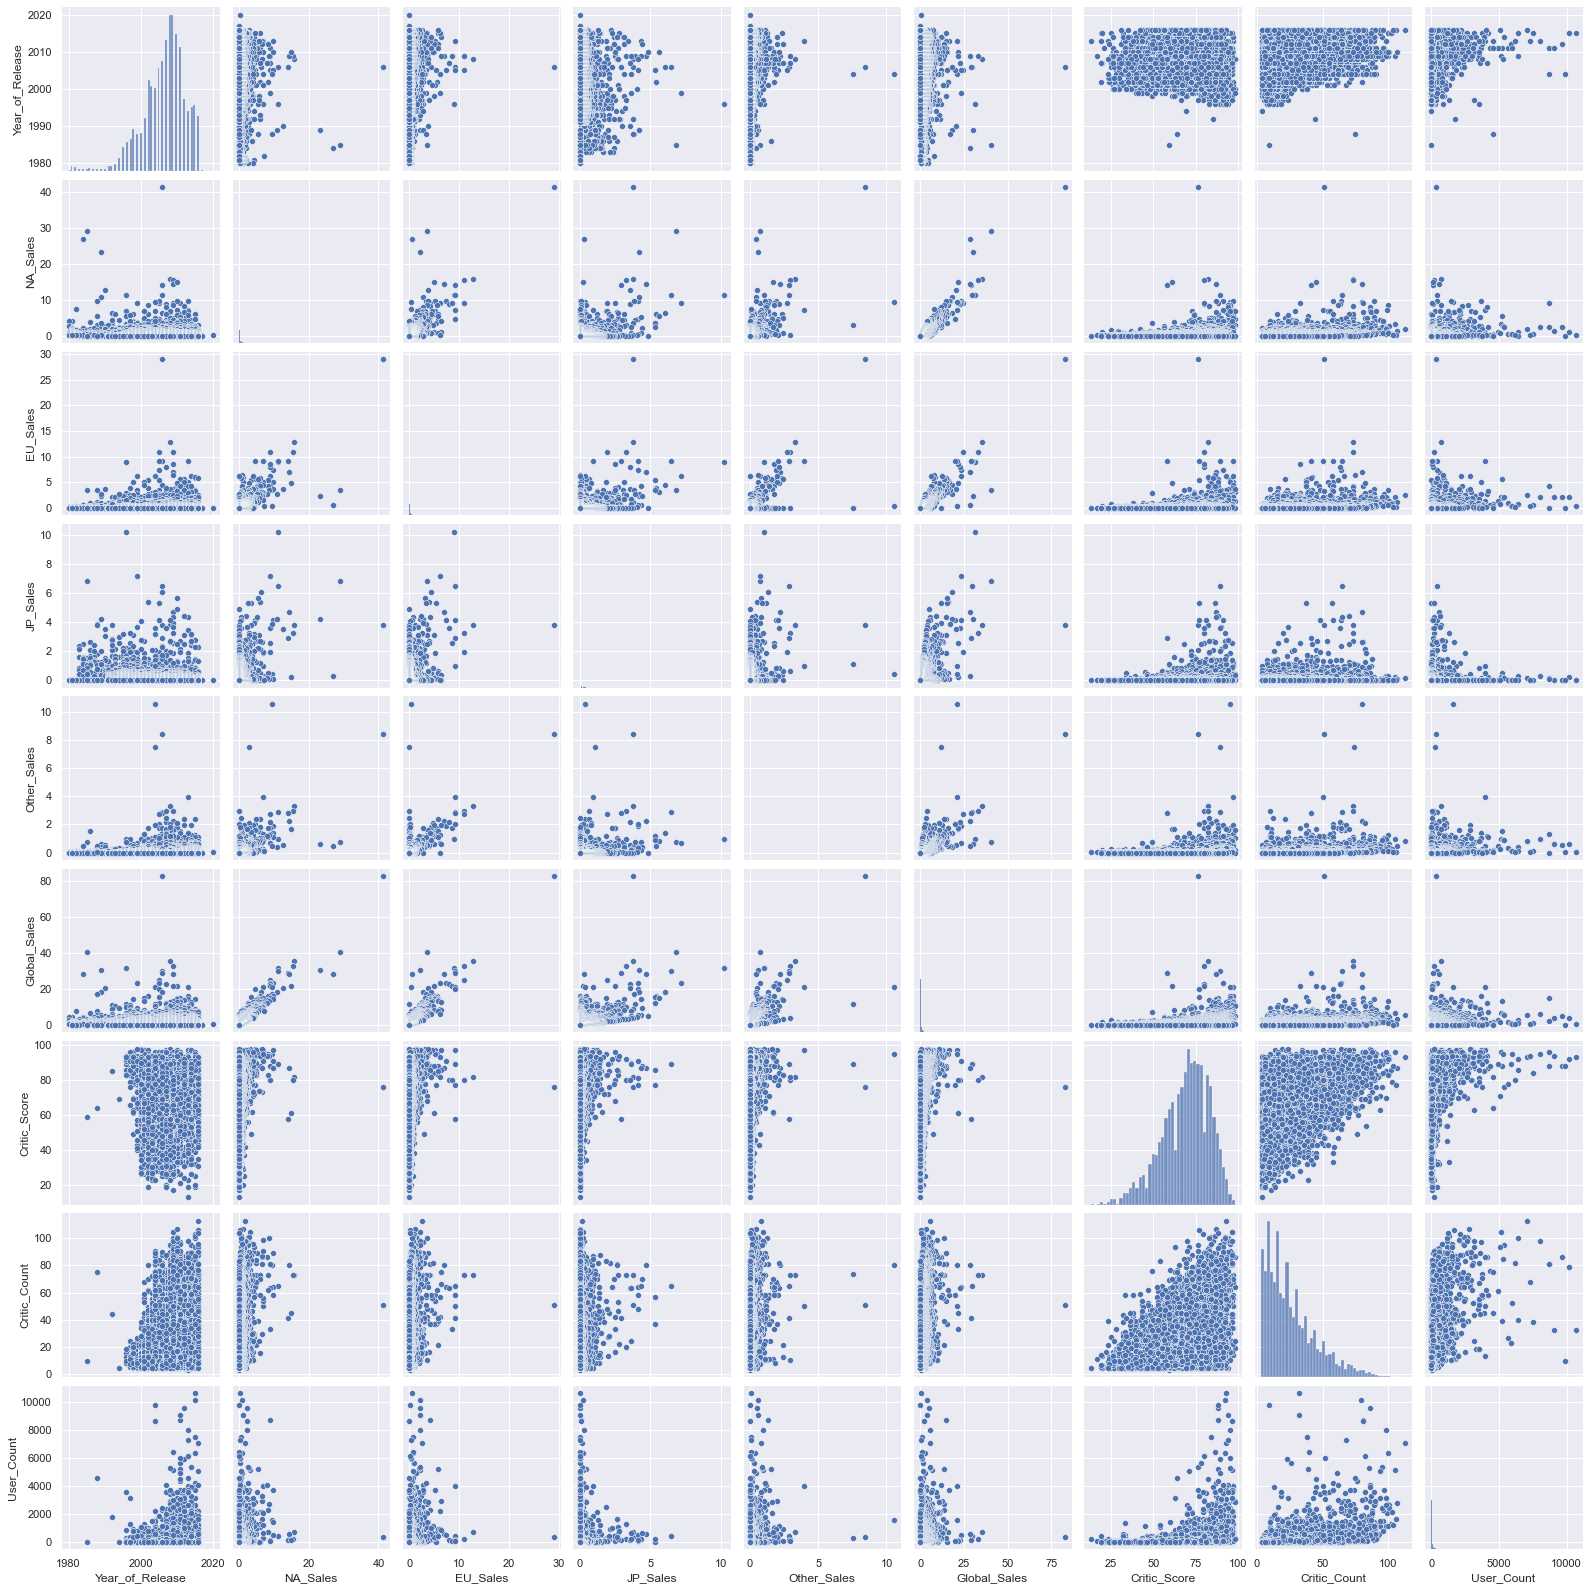

In [60]:
# part b
sns.pairplot(videogame_df)

In [69]:
# part c
display(videogame_df.groupby('Year_of_Release').size())

Year_of_Release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
2017.0       3
2020.0       1
dtype: int64

In [86]:
# part d
display(videogame_df.groupby('Year_of_Release').sum())

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,,,,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38,0.0,0.0,0.0
1981.0,33.40,1.96,0.00,0.32,35.77,0.0,0.0,0.0
1982.0,26.92,1.65,0.00,0.31,28.86,0.0,0.0,0.0
1983.0,7.76,0.80,8.10,0.14,16.79,0.0,0.0,0.0
1984.0,33.28,2.10,14.27,0.70,50.36,0.0,0.0,0.0
1985.0,33.73,4.74,14.56,0.92,53.94,59.0,9.0,19.0
1986.0,12.50,2.84,19.81,1.93,37.07,0.0,0.0,0.0
1987.0,8.46,1.41,11.63,0.20,21.74,0.0,0.0,0.0
1988.0,23.87,6.59,15.76,0.99,47.22,64.0,75.0,4572.0


In [138]:
# part e
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if df[feature_name].dtypes == 'float64':
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
            
    return result

videogame_normalized = normalize(videogame_df)
videogame_normalized

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,0.650,Sports,Nintendo,1.000000,1.000000,0.368885,0.799432,1.000000,0.741176,0.436364,8,0.029828,Nintendo,E
1,Super Mario Bros.,NES,0.125,Platform,Nintendo,0.703095,0.123619,0.666341,0.072848,0.487518,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,0.700,Racing,Nintendo,0.379110,0.440608,0.370841,0.311258,0.430320,0.811765,0.636364,8.3,0.066129,Nintendo,E
3,Wii Sports Resort,Wii,0.725,Sports,Nintendo,0.377418,0.377417,0.320939,0.279092,0.396995,0.788235,0.636364,8,0.017634,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,0.400,Role-Playing,Nintendo,0.272485,0.306975,1.000000,0.094607,0.380029,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,0.900,Action,Tecmo Koei,0.000000,0.000000,0.000978,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,0.650,Sports,Codemasters,0.000000,0.000345,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,0.900,Adventure,Idea Factory,0.000000,0.000000,0.000978,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,0.575,Platform,Wanadoo,0.000242,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


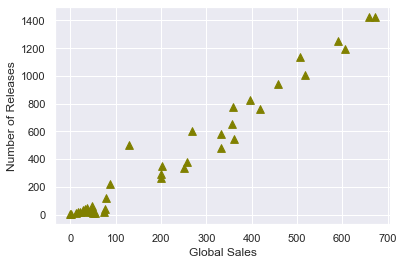

In [166]:
#part f
y = videogame_df.groupby('Year_of_Release').agg({'Global_Sales':'sum'})
y['Release_Count'] = videogame_df.groupby('Year_of_Release').size()

plt.figure(figsize = (6,4))
plt.scatter(x = y['Global_Sales'], y = y['Release_Count'], marker = '^', s = 60, c = 'olive')
plt.xlabel('Global Sales')
plt.ylabel('Number of Releases')
plt.show()

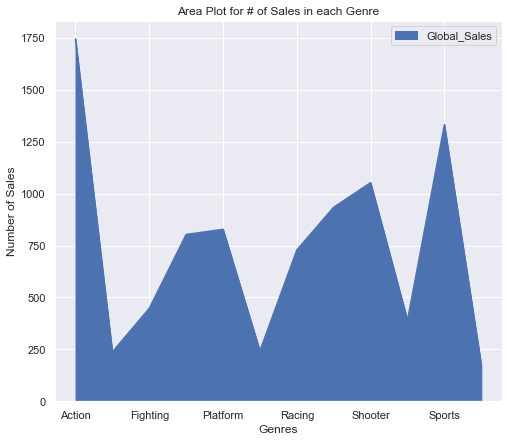

In [113]:
# part g
genre_total_sale = videogame_df.groupby('Genre').agg({'Global_Sales':'sum'})
genre_total_sale['Genre1'] = genre_total_sale.index

genre_total_sale.plot.area(x = 'Genre1', y = 'Global_Sales', title = "Area Plot for # of Sales in each Genre")
plt.xlabel("Genres")
plt.ylabel('Number of Sales')
plt.show()

In [173]:
# part h
videogame_df.groupby(['Year_of_Release','Genre']).agg({'Global_Sales':'sum'}).unstack()

Global_Sales                                                   \
Genre                 Action Adventure Fighting   Misc Platform Puzzle Racing   
Year_of_Release                                                                 
1980.0                  0.34       NaN     0.77   2.71      NaN    NaN    NaN   
1981.0                 14.84       NaN      NaN    NaN     6.93   2.24   0.48   
1982.0                  6.52       NaN      NaN   0.87     5.03  10.03   1.57   
1983.0                  2.86      0.40      NaN   2.14     6.93   0.78    NaN   
1984.0                  1.85       NaN      NaN   1.45     0.69   3.14   5.95   
1985.0                  3.52       NaN     1.05    NaN    43.17   3.21    NaN   
1986.0                 13.74       NaN      NaN    NaN     9.39    NaN   1.96   
1987.0                  1.12      4.38     5.42    NaN     1.74    NaN    NaN   
1988.0                  1.75       NaN      NaN    NaN    27.73   5.58   2.14   
1989.0                  4.64       NaN      NaN   1.28    20.66  37.75    NaN   
1990.0                  6.39       NaN      NaN    NaN    22.97   6.00   6.26   
1991.0                  6.76      2.24     0.39   0.08     7.64   3.24   1.14   
1992.0                  3.83     12.24    15.25   4.94    13.42   4.84   9.04   
1993.0                  1.81      0.07     8.75   0.30    18.67   3.17   0.36   
1994.0                  1.55      3.74     8.48   2.86    28.74   1.53   2.19   
1995.0                  3.57      0.72    14.85   6.40    16.69   2.71   6.09   
1996.0                 20.58      4.19    18.06  10.68    28.23   3.91  28.24   
1997.0                 27.58      4.96    11.76   5.69    21.85   5.89  31.91   
1998.0                 39.44      9.05    31.66  11.94    29.88   6.34  27.90   
1999.0                 27.77      7.60    14.26  20.65    20.82   1.36  37.27   
2000.0                 34.04      2.98    20.22  15.54    16.06   3.82  19.99   
2001.0                 59.39      9.12    18.12  16.40    39.28   8.00  55.81   
2002.0                 86.76     11.05    25.02  15.67    45.97   5.34  30.20   
2003.0                 67.93      2.14    23.73  23.82    42.89   2.42  52.19   
2004.0                 76.25      8.69    16.78  31.32    47.22   8.40  47.83   
2005.0                 85.53      8.44    19.71  61.08    23.39  20.42  56.03   
2006.0                 66.13     11.37    22.42  67.07    49.35  10.80  33.86   
2007.0                104.97     24.10    17.49  91.52    35.10  23.74  38.87   
2008.0                135.01     24.71    35.04  86.05    35.14  15.29  70.03   
2009.0                137.66     20.20    31.88  75.80    40.58  19.80  33.65   
2010.0                115.49     16.00    14.72  95.20    30.98  10.74  34.36   
2011.0                116.76     15.61    22.37  54.45    27.71   4.95  34.83   
2012.0                119.10      5.80     9.20  22.21    18.37   1.72  13.68   
2013.0                122.57      6.07     7.04  25.28    24.59   0.95  12.33   
2014.0                 97.30      5.61    15.83  23.35     8.78   1.49  16.64   
2015.0                 72.04      8.15     7.92  11.56     6.06   0.72   8.07   
2016.0                 30.23      3.83     4.44   2.63     3.21   0.01   2.83   
2017.0                  0.01       NaN      NaN    NaN      NaN    NaN    NaN   
2020.0                   NaN       NaN      NaN    NaN      NaN    NaN    NaN   

                                                                  
Genre           Role-Playing Shooter Simulation  Sports Strategy  
Year_of_Release                                                   
1980.0                   NaN    7.07        NaN    0.49      NaN  
1981.0                   NaN   10.04       0.45    0.79      NaN  
1982.0                   NaN    3.79        NaN    1.05      NaN  
1983.0                   NaN    0.48        NaN    3.20      NaN  
1984.0                   NaN   31.10        NaN    6.18      NaN  
1985.0                   NaN    1.00       0.03    1.96      NaN  
1986.0    

In [106]:
# part i
videogame_df.groupby('Genre').agg({'Global_Sales':'sum'}).sort_values(by = 'Global_Sales', ascending = False)

,Global_Sales
Genre,
Action,1745.27
Sports,1332.00
Shooter,1052.94
Role-Playing,934.40
Platform,828.08
Misc,803.18
Racing,728.90
Fighting,447.48
Simulation,390.42
